Importamos los paquetes que vamos a necesitar.

In [75]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score
import numpy as np

In [3]:
# Visualization style
%matplotlib inline
sns.set()

# Importamos ahora el set de datos train y test para su exploración y análisis

In [6]:
# Import test and train datasets
dftrain = pd.read_csv('/Users/carinazavala/Documents/UOC/1er Semestre/Tipología y ciclo de vida de los datos/PEC3/csv/train.csv')
dftest = pd.read_csv('/Users/carinazavala/Documents/UOC/1er Semestre/Tipología y ciclo de vida de los datos/PEC3/csv/test.csv')

# View first lines of training data
dftrain.head(n=4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [8]:
# Summary visualization of train data 
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [ ]:
# Do same visualization of test data
dftest.head(n=4)

In [ ]:
dftest.info()

Comparamos las distribuciones de los datos train y test para conocer qué tanto difieren uno del otro

In [9]:
# Compare distribution of features in train and test data with describe 
dftrain.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
dftest.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


La desviación estándar son similares comparando Pclass y Age en los datos train y test, pero para Parch y Fare son ligeramente mayores en test, mientras que, SibSp es mayor en train.

Visualización gráfica de pasajeros que sobrevivieron o murieron en train.

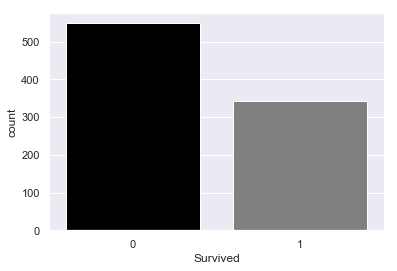

In [16]:
# Review how many passengers survived and died in train data
sns.countplot(x='Survived', data=dftrain,
             palette=sns.color_palette(['black','grey']));

In [12]:
# Obtain the survived percentage in train data
print(dftrain.Survived.sum()/dftrain.Survived.count())

# the result shows that 38 % survived 

0.3838383838383838


38% de los pasajeros sobrevivieron
->modelo1:sin sobrevivientes
submission:0.627 accuracy

In [25]:
dftest['Survived'] = 0
dftest[['PassengerId', 'Survived']].to_csv('no_survivors.csv', index=False)

Variable = Sex, Sobrevivieron más mujeres que hombres 

In [13]:
# Analizing survivors per sex in train data 
dftrain.groupby(['Survived','Sex'])['Survived'].count()
# more female passengers survived

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

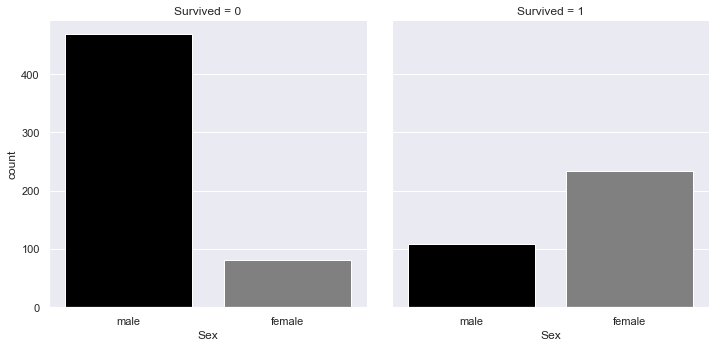

In [15]:
# Plotting this in bar chart
sns.catplot(x='Sex', col='Survived', kind='count', data=dftrain,
           palette=sns.color_palette(['black','grey']))

In [17]:
# Obtain the survived percentage per sex train data
print("% of women survived: " , dftrain[dftrain.Sex == 'female'].Survived.sum()/dftrain[dftrain.Sex == 'female'].Survived.count())
print("% of men survived:   " , dftrain[dftrain.Sex == 'male'].Survived.sum()/dftrain[dftrain.Sex == 'male'].Survived.count())

% of women survived:  0.7420382165605095
% of men survived:    0.18890814558058924


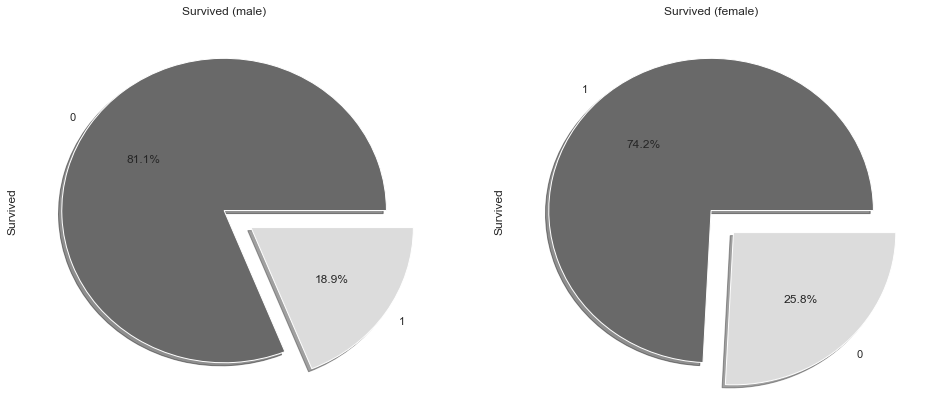

In [28]:
# Visualization of percentage per sex survivors in pie plott
colors=['dimgrey','gainsboro']
f,ax=plt.subplots(1,2,figsize=(16,7))
dftrain['Survived'][dftrain['Sex']=='male'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True,colors=colors)
dftrain['Survived'][dftrain['Sex']=='female'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[1],shadow=True,colors=colors)
ax[0].set_title('Survived (male)')
ax[1].set_title('Survived (female)')

plt.show()

En los datos de entrenamiento el 74% de las mujeres sobrevivieron

->modelo2: todas las mujeres sobrevivieron y todos los hombres murieron 
submission:0.766 accueracy


In [26]:
dftest['Survived'] = dftest.Sex == 'female'
dftest['Survived'] = dftest.Survived.apply(lambda x: int(x))
dftest[['PassengerId', 'Survived']].to_csv('women_survive.csv', index=False)

Passgenger Class, la tasa de supervivencia decrece con Pclass

In [27]:
pd.crosstab(dftrain.Pclass, dftrain.Survived, margins=True).style.background_gradient(cmap='PuBu')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [29]:
print("% of survivals in") 
print("Pclass=1 : ", dftrain.Survived[dftrain.Pclass == 1].sum()/dftrain[dftrain.Pclass == 1].Survived.count())
print("Pclass=2 : ", dftrain.Survived[dftrain.Pclass == 2].sum()/dftrain[dftrain.Pclass == 2].Survived.count())
print("Pclass=3 : ", dftrain.Survived[dftrain.Pclass == 3].sum()/dftrain[dftrain.Pclass == 3].Survived.count())

% of survivals in
Pclass=1 :  0.6296296296296297
Pclass=2 :  0.47282608695652173
Pclass=3 :  0.24236252545824846


Hubieron más sobrevivientes con Pclass=1 el 62.9%, visualización gráfica de este comportamiento.

/Users/carinazavala/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


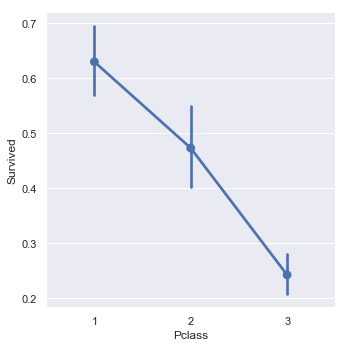

In [30]:
sns.catplot('Pclass','Survived', kind='point', data=dftrain);

Class and Sex, casi todas las mujeres en Pclass 1 y 2 sobrevivieron y casi todos los hombres en Pclass 2 y 3 murieron

In [32]:
pd.crosstab([dftrain.Sex, dftrain.Survived], dftrain.Pclass, margins=True).style.background_gradient(cmap='PuBu')

/Users/carinazavala/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


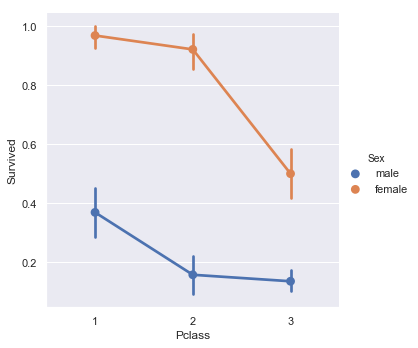

In [33]:
sns.catplot('Pclass','Survived',hue='Sex', kind='point', data=dftrain);

Embarked : Tasa de supervivencia menor para S y mayor para C

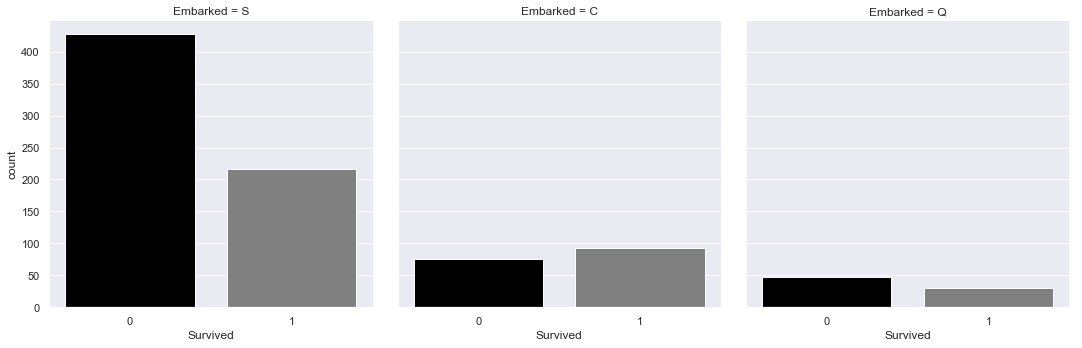

In [34]:
sns.catplot(x='Survived', col='Embarked', kind='count', data=dftrain,
           palette=sns.color_palette(['black','grey']));

/Users/carinazavala/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


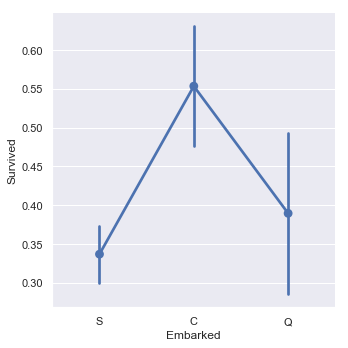

In [35]:
sns.catplot('Embarked','Survived', kind='point', data=dftrain)
plt.show()

Embarked and Sex

/Users/carinazavala/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


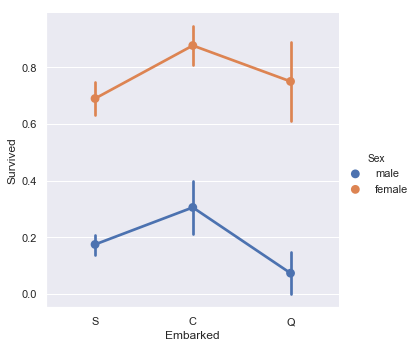

In [37]:
sns.catplot('Embarked','Survived', hue= 'Sex', kind='point', data=dftrain)
plt.show()

Embarked, Pclass y Sex :

Practicamente todas las mujeres de Pclass 2 que embarcaron en C y Q sobrevivieron, también casi todas las mujeres de Pclass 1.

Todos los hombres de Pclass 1 y 2 embarcados en Q murieron, la tasa de supervivencia de los hombres en Pclass 2 y 3 fue menor a 0.2

Los hombres restantes en Pclass 1 embarcados en S y Q, tuvieron una tasa de supervivencia cercana a 0.4

/Users/carinazavala/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


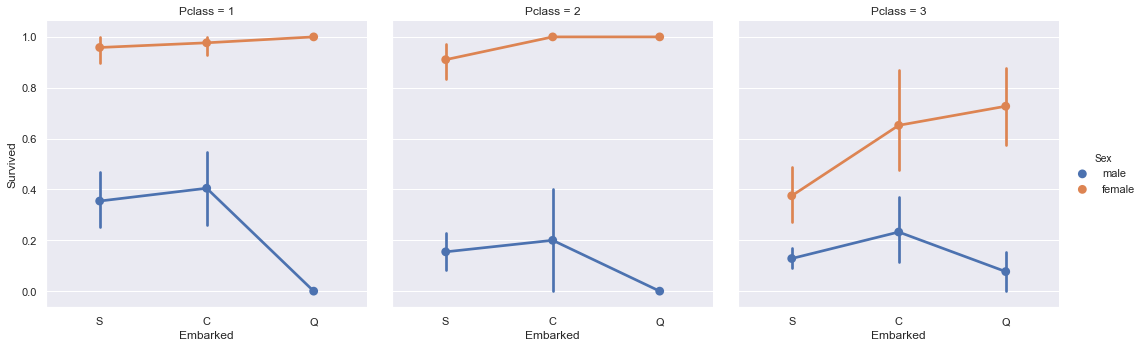

In [38]:
sns.catplot('Embarked','Survived', col='Pclass', hue= 'Sex', kind='point', data=dftrain)
plt.show()

In [39]:
pd.crosstab([dftrain.Survived], [dftrain.Sex, dftrain.Pclass, dftrain.Embarked], margins=True)

Sex      female                              male                            \
Pclass        1         2          3            1          2          3       
Embarked      C  Q   S  C  Q   S   C   Q   S    C  Q   S   C  Q   S   C   Q   
Survived                                                                      
0             1  0   2  0  0   6   8   9  55   25  1  51   8  1  82  33  36   
1            42  1  46  7  2  61  15  24  33   17  0  28   2  0  15  10   3   
All          43  1  48  7  2  67  23  33  88   42  1  79  10  1  97  43  39   

Sex            All  
Pclass              
Embarked    S       
Survived            
0         231  549  
1          34  340  
All       265  889

modelo3 : basado en PClass, Sex y Embarked , submission : 0.779 accuracy

In [40]:
# model 3
dftest['Survived'] = 0
# all women survived
dftest.loc[ (dftest.Sex == 'female'), 'Survived'] = 1
# except for those in Pclass 3 and embarked in S
dftest.loc[ (dftest.Sex == 'female') & (dftest.Pclass == 3) & (dftest.Embarked == 'S') , 'Survived'] = 0
dftest[['PassengerId', 'Survived']].to_csv('embarked_pclass_sex.csv', index=False)

In [45]:
for df in [dftrain, dftest]:
    df['Age_bin']=np.nan
    for i in range(8,0,-1):
        df.loc[ df['Age'] <= i*10, 'Age_bin'] = i


In [46]:
print(dftrain[['Age' , 'Age_bin']].head(10))

    Age  Age_bin
0  22.0      3.0
1  38.0      4.0
2  26.0      3.0
3  35.0      4.0
4  35.0      4.0
5   NaN      NaN
6  54.0      6.0
7   2.0      1.0
8  27.0      3.0
9  14.0      2.0


/Users/carinazavala/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


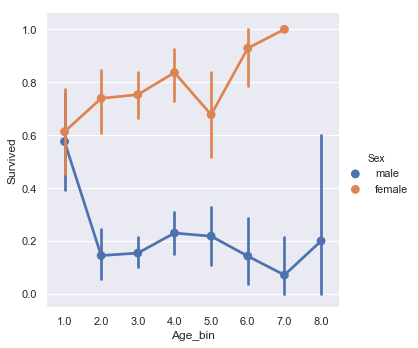

In [47]:
sns.catplot('Age_bin','Survived',hue='Sex',kind='point',data=dftrain)
plt.show()

/Users/carinazavala/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


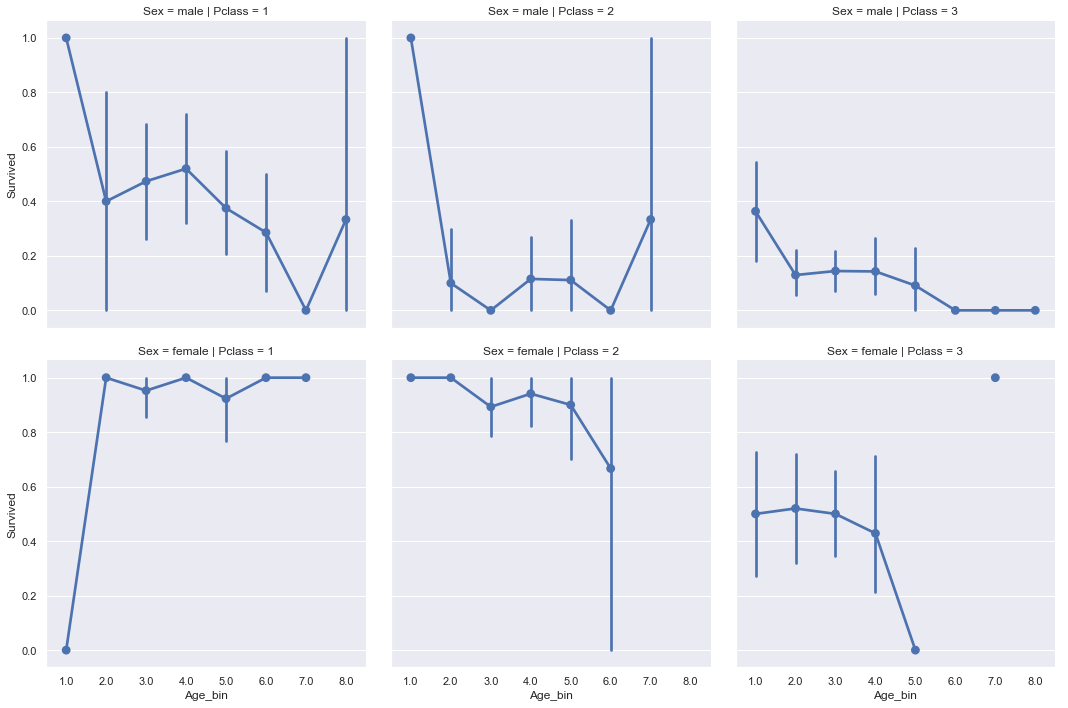

In [48]:
sns.catplot('Age_bin','Survived', col='Pclass' , row = 'Sex', kind='point', data=dftrain)
plt.show()

In [49]:
pd.crosstab([dftrain.Sex, dftrain.Survived], [dftrain.Age_bin, dftrain.Pclass], margins=True).style.background_gradient(cmap='PuBu')

Para pasajeros en 

*Age_bim=1(menores a 10): todos los hombres en Pclass=1 y 2 sobrevivieron.

*Mujeres en Pclass=3 y Age_bin= 5 murieron 

*Menos del 50% de mujeres en Pclass=3 y Age_bin=4 sobrevivieron

*Más del 50% de hombres en Pclass=1 y Age_bin=4 sobrevivieron

In [50]:
# in Pclass 1 and 2 all men in Age_bin = 1 survived
dftest.loc[ (dftest.Sex == 'male') & (dftest.Pclass == 1) & (dftest.Age_bin == 1), 'Survived'] = 1
dftest.loc[ (dftest.Sex == 'male') & (dftest.Pclass == 2) & (dftest.Age_bin == 1), 'Survived'] = 1

SibSp y Parch

/Users/carinazavala/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


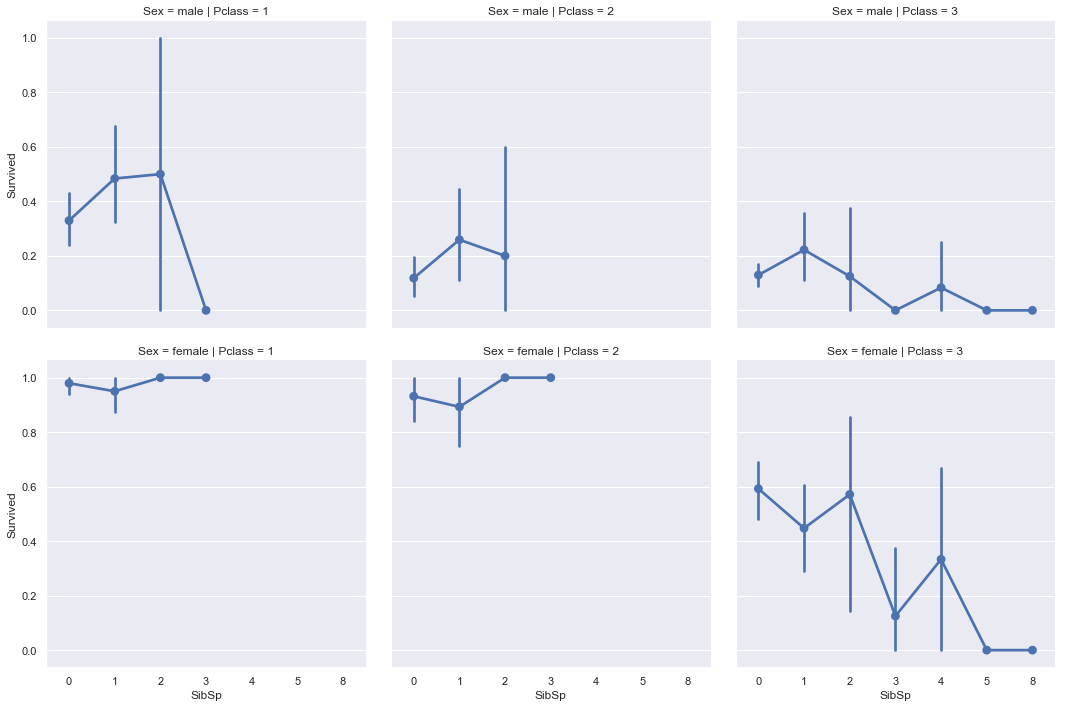

In [51]:
sns.catplot('SibSp','Survived', col='Pclass' , row = 'Sex', kind='point', data=dftrain)
plt.show()

In [52]:
pd.crosstab([dftrain.Sex, dftrain.Survived], [dftrain.SibSp, dftrain.Pclass], margins=True).style.background_gradient(cmap='PuBu')

*Para hombres, no hubo porcentaje de sobrevivencia para ningún valor arriba de 0.5 en SibSp.

*Para mujeres, pasajeras con SibSp=3 y Pclass=3 murieron con SibSp>4

*Para mujeres, pasajeras con SibSp=1 y Pclass=3 el porcentaje de sobrevivencia está por denajo de 50%

In [55]:
# all females with SibSp > 7 died
dftest.loc[ (dftest.Sex == 'female') & (dftest.SibSp > 7) , 'Survived'] = 0

/Users/carinazavala/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


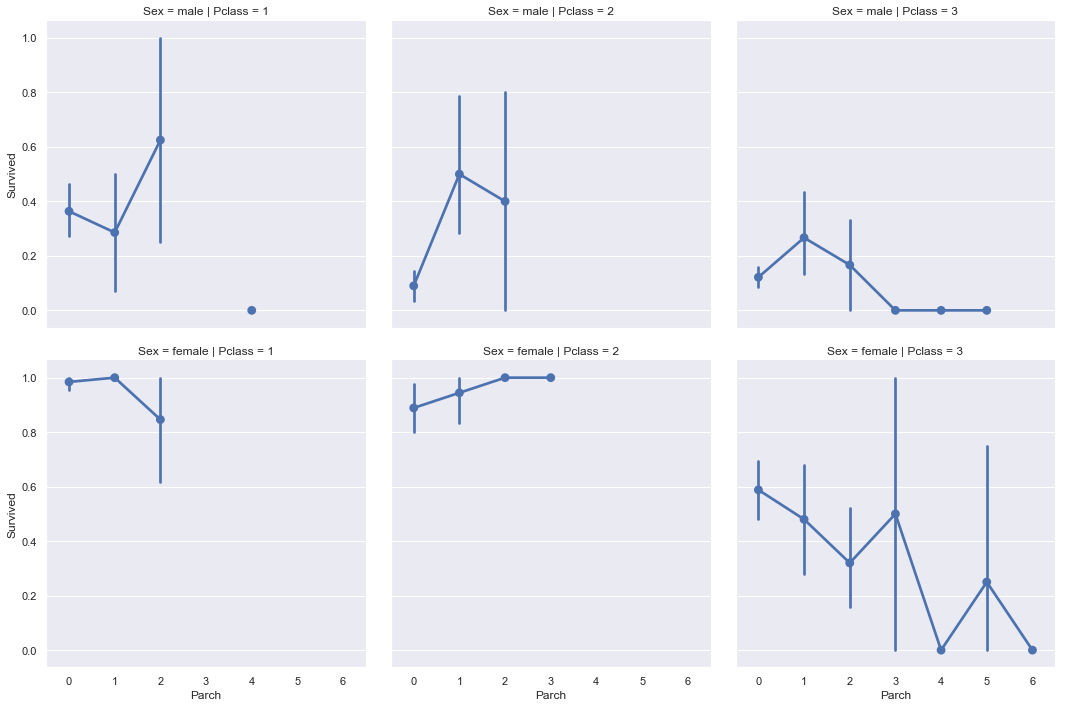

In [56]:
sns.catplot('Parch','Survived', col='Pclass' , row = 'Sex', kind='point', data=dftrain)
plt.show()

In [57]:
pd.crosstab([dftrain.Sex, dftrain.Survived], [dftrain.Parch, dftrain.Pclass], margins=True).style.background_gradient(cmap='PuBu')

*Mujeres con Parch = 2 y Pclass = 3 la tasa de supervivencia está. por debajo de 0.5.

*Todas las mujeres con Parch = 4 y Pclass = 3 murieron.

*Todas las mujeres con Parch > 4 murieron. 

*Las mujeres con Parch = 1 y Pclass = 3  tasa de supervivencia está por debajo de  0.5

*Para hombres todas las tasas de supervivencia es menor a 0.5 para cualquier valor de Parch, excepto para Parch = 2 y Pclass = 1.

In [60]:
# survival rate is below 0.5 for females with Parch = 2 and Pclass = 3 
dftest.loc[ (dftest.Sex == 'female') & (dftest.Pclass == 3) & (dftest.Parch == 2), 'Survived'] = 0

# All females with Parch = 4 and Pclass = 3 died
dftest.loc[ (dftest.Sex == 'female') & (dftest.Pclass == 3) & (dftest.Parch == 4), 'Survived'] = 0

# all females with Parch > 4 died
dftest.loc[ (dftest.Sex == 'female') & (dftest.Parch > 4) , 'Survived'] = 0

# For males with Parch = 2 and Pclass = 1 survival rate is above 0.5
dftest.loc[ (dftest.Sex == 'male') & (dftest.Pclass == 1) & (dftest.Parch == 1) , 'Survived'] = 1

dftest.head(20)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Age_bin
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,4.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,5.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,7.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,3.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,3.0
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,0,2.0
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,1,3.0
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,0,3.0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,1,2.0
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,0,3.0


Fare : numérica continua a 12 contenedores

/Users/carinazavala/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


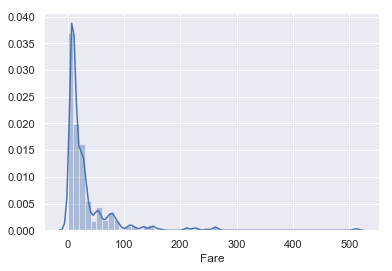

In [61]:
sns.distplot(dftrain['Fare'])
plt.show()

In [62]:
for df in [dftrain, dftest]:
    df['Fare_bin']=np.nan
    for i in range(12,0,-1):
        df.loc[ df['Fare'] <= i*50, 'Fare_bin'] = i

/Users/carinazavala/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


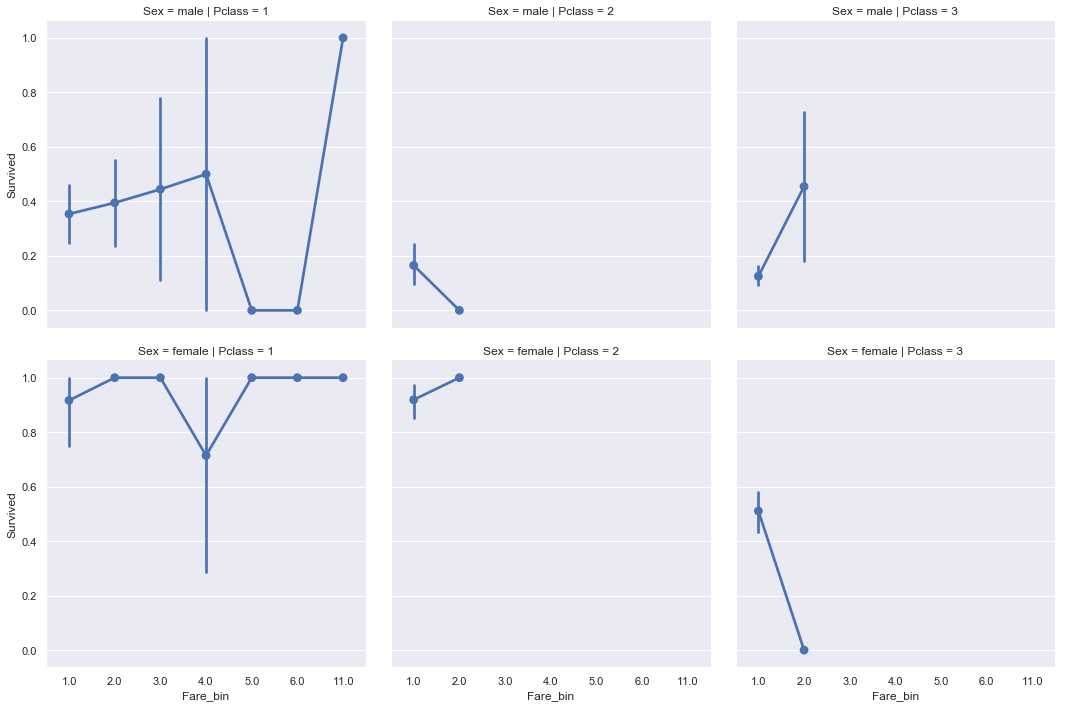

In [63]:
sns.catplot('Fare_bin','Survived', col='Pclass' , row = 'Sex', kind='point', data=dftrain)
plt.show()

In [76]:
pd.crosstab([dftrain.Sex, dftrain.Survived], [dftrain.Fare_bin, dftrain.Pclass], margins=True).style.background_gradient(cmap='PuBu')

In [77]:
# males in Fare_bin = 11 survived
dftest.loc[ (dftest.Sex == 'male') & (dftest.Fare_bin == 11), 'Survived'] = 1

modelo4: modelo3 + Age_bin, SibSp,Parch and Fare_bin
submission:0.789 accuracy

In [78]:
# modelo4
dftest[['PassengerId', 'Survived']].to_csv('model_4.csv', index=False)


In [79]:
dftest.drop(['Survived'],axis=1,inplace=True)

# Data wrangling

Construir dos nuevos dataframes dftrain_ml y dftest_ml, los cuales sólo contendrán ordinales y no nulos para ser usados en algoritmos de machine learning

1.Copiar los datos para los nuevos dataframes
2.Convertir de categóricas a numéricas las variables con pd.get_dummies
3.Dejar de lado las variables que no sean útiles en la predicción
4.Usar Standard scaler y aplicar la división train/test

In [80]:
#1
dftrain_ml = dftrain.copy()
dftest_ml = dftest.copy()

In [81]:
#2
dftrain_ml = pd.get_dummies(dftrain_ml, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)
dftrain_ml.drop(['PassengerId','Name','Ticket', 'Cabin', 'Age_bin', 'Fare_bin'],axis=1,inplace=True)
dftrain_ml.dropna(inplace=True)

In [82]:
#3
passenger_id = dftest_ml['PassengerId']
dftest_ml = pd.get_dummies(dftest_ml, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)
dftest_ml.drop(['PassengerId','Name','Ticket', 'Cabin', 'Age_bin', 'Fare_bin'],axis=1,inplace=True)

Visualizamos los datos con .head y .info

In [83]:
dftrain_ml.head(10)

,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1
6,0,54.0,0,0,51.8625,1,0,1,0,0
7,0,2.0,3,1,21.0750,1,0,1,0,1
8,1,27.0,0,2,11.1333,0,0,1,0,1
9,1,14.0,1,0,30.0708,0,0,0,1,0
10,1,4.0,1,1,16.7000,0,0,1,0,1


In [84]:
dftrain_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 10 columns):
Survived      714 non-null int64
Age           714 non-null float64
SibSp         714 non-null int64
Parch         714 non-null int64
Fare          714 non-null float64
Sex_male      714 non-null uint8
Embarked_Q    714 non-null uint8
Embarked_S    714 non-null uint8
Pclass_2      714 non-null uint8
Pclass_3      714 non-null uint8
dtypes: float64(2), int64(3), uint8(5)
memory usage: 37.0 KB


In [85]:
dftest_ml.head(10)

,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,34.5,0,0,7.8292,1,1,0,0,1
1,47.0,1,0,7.0000,0,0,1,0,1
2,62.0,0,0,9.6875,1,1,0,1,0
3,27.0,0,0,8.6625,1,0,1,0,1
4,22.0,1,1,12.2875,0,0,1,0,1
5,14.0,0,0,9.2250,1,0,1,0,1
6,30.0,0,0,7.6292,0,1,0,0,1
7,26.0,1,1,29.0000,1,0,1,1,0
8,18.0,0,0,7.2292,0,0,0,0,1
9,21.0,2,0,24.1500,1,0,1,0,1


In [86]:
dftest_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
Age           332 non-null float64
SibSp         418 non-null int64
Parch         418 non-null int64
Fare          417 non-null float64
Sex_male      418 non-null uint8
Embarked_Q    418 non-null uint8
Embarked_S    418 non-null uint8
Pclass_2      418 non-null uint8
Pclass_3      418 non-null uint8
dtypes: float64(2), int64(2), uint8(5)
memory usage: 15.2 KB


Matriz de correlación

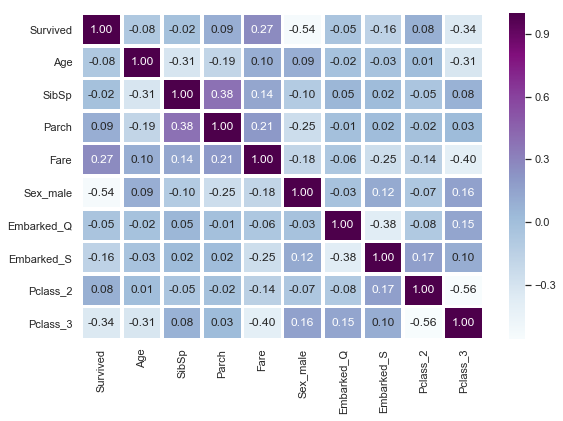

In [99]:
corr = dftrain_ml.corr()
f,ax = plt.subplots(figsize=(9,6))
sns.heatmap(corr, cmap='BuPu', annot = True, linewidths=2.5 , fmt = '.2f',ax=ax)
plt.show()

Correlaciones

Survived vs Fare están correlacionadas positivamente
Survived vs Sex_male están correlacionadas negativamente
Survived vs Pclass_3 están correlacionadas negativamente
SibSp vs Parch están correlacionadas positivamente

# Preprocesamiento de datos con Standard Scaler

Es necesario estandarizar transformar los datos para calcular la media y desviación estándar en un conjunto de entrenamiento (dftrain_ml) para que luego se vuelva a aplicar la misma transformación en el conjunto de prueba (dftest_ml).

In [92]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

Transformación de dftrain_ml

In [ ]:
# for dftrain_ml
scaler.fit(dftrain_ml.drop('Survived',axis=1))
scaled_features = scaler.transform(dftrain_ml.drop('Survived',axis=1))
dftrain_ml_sc = pd.DataFrame(scaled_features, columns=dftrain_ml.columns[:-1])
dftrain_ml_sc.head(4)

Transformación de dftest_ml

In [101]:
# for dftest_ml
dftest_ml.fillna(dftest_ml.mean(), inplace=True)
# scaler.fit(dftest_ml)
scaled_features = scaler.transform(dftest_ml)
dftest_ml_sc = pd.DataFrame(scaled_features, columns=dftest_ml.columns)
dftest_ml_sc.head(4)

,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0.330723,-0.551703,-0.505895,-0.508025,0.759051,4.949747,-1.860779,-0.565489,1.005618
1,1.191823,0.524570,-0.505895,-0.523705,-1.317434,-0.202031,0.537409,-0.565489,1.005618
2,2.225142,-0.551703,-0.505895,-0.472885,0.759051,4.949747,-1.860779,1.768380,-0.994413
3,-0.185937,-0.551703,-0.505895,-0.492267,0.759051,-0.202031,0.537409,-0.565489,1.005618


Dividir train/test
utilizaremos el 70% de los datos para el entrenamiento y el 30% para pruebas

In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dftrain_ml.drop('Survived',axis=1), dftrain_ml['Survived'], test_size=0.30, random_state=101)
X_train_sc, X_test_sc, y_train_sc, y_test_sc = train_test_split(dftrain_ml_sc, dftrain_ml['Survived'], test_size=0.30, random_state=101)

In [103]:
# all data 
# unscaled
X_train_all = dftrain_ml.drop('Survived',axis=1)
y_train_all = dftrain_ml['Survived']
X_test_all = dftest_ml

# scaled
X_train_all_sc = dftrain_ml_sc
y_train_all_sc = dftrain_ml['Survived']
X_test_all_sc = dftest_ml_sc

In [104]:
# fillna: fill nan with mean values for that column
X_test_all.fillna(X_test_all.mean(), inplace=True)
print("*")

*


# Algoritmos de machine learning y comparación del resultado de los modelos